# 🌳 Decision Tree Regression

## 📌 The Regression Formula:
$\
    \hat{y} = \sum_{j=1}^{J} c_j \cdot I(x \in R_j)
$

### **Where:**
✔ **\( \hat{y} \) (Predicted Value)** → The estimated outcome (e.g., salary 💰)  
✔ **\( J \)** → The number of terminal (leaf) regions in the tree  
✔ **\( c_j \)** → The constant predicted value for all \( x \) in region \( R_j \)  
✔ **\( I(x \in R_j) \)** → Indicator function that checks if \( x \) belongs to region \( R_j \)  

⚠ **\( \epsilon \) (Error Term)** → Represents the difference between actual and predicted values due to noise 🔄  

---

## 🔑 **Key Insight:**
- The **Decision Tree model** splits data into regions based on **feature thresholds**.  
- Each **region (\( R_j \))** has a constant predicted value, minimizing variance within the region.  
- **More splits → More complex model**, but risk of **overfitting** increases.  
- Decision Trees can **capture non-linearity** in data but can be **sensitive to small changes**.  
- Unlike **Linear Regression**, Decision Trees do not require feature scaling.  

💡 **Decision Tree Regression is powerful when relationships between variables are non-linear and require an interpretable model!**  


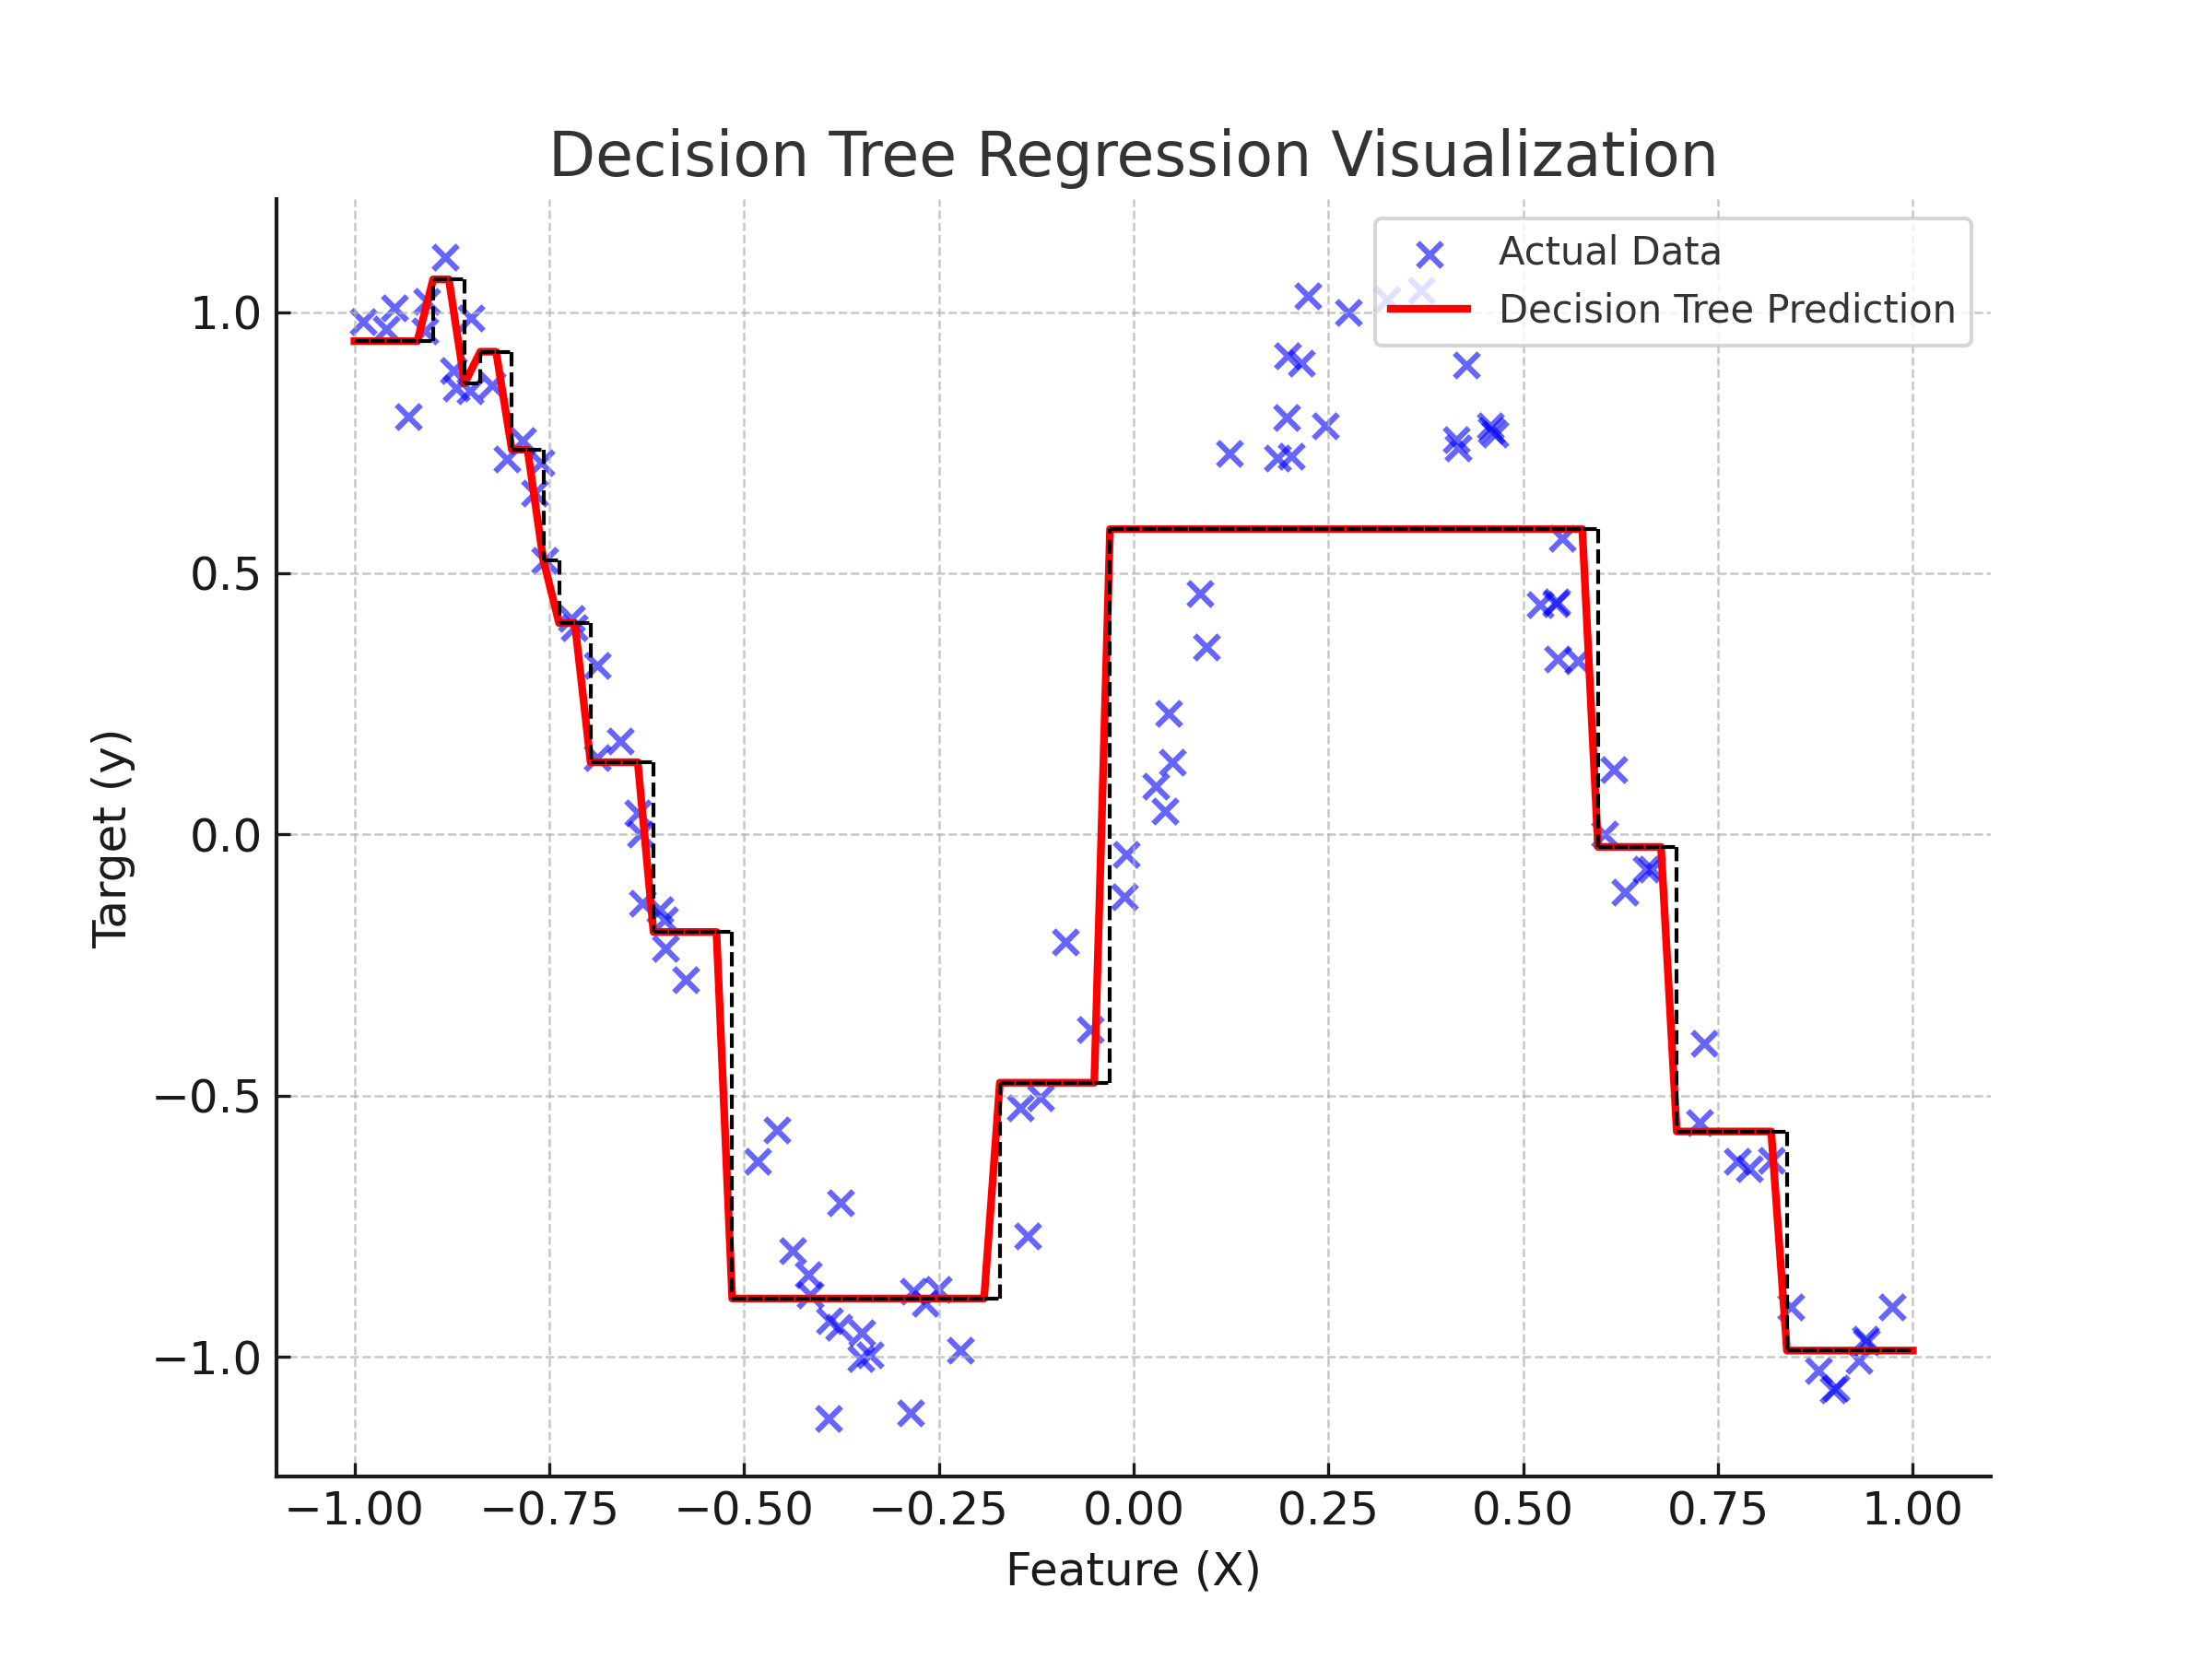

#📌 Importing Libraries

In [ ]:
# 📌 Import necessary libraries
import numpy as np  # Library for numerical operations
import pandas as pd  # Library for handling data frames
import matplotlib.pyplot as plt  # Library for data visualization
import seaborn as sns  # Library for enhanced visualizations
from sklearn.model_selection import train_test_split  # Function to split data into training and testing sets
from sklearn.tree import DecisionTreeRegressor  # Decision Tree model for regression
from sklearn.ensemble import RandomForestRegressor  # Random Forest model for regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Metrics for evaluating models

#📂 Loading the Dataset

In [ ]:
data_path = "housing.csv"  # Define the dataset path
df = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [ ]:
df = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

#🛠️ Splitting Data into Training and Testing Sets

In [ ]:
# 🛠️ Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#🌳 Training the Decision Tree Model

In [ ]:
# 🌳 Train Decision Tree Model
model_dt = DecisionTreeRegressor(random_state=42)  # Initialize the Decision Tree model
model_dt.fit(X_train, y_train)  # Train the model using the training set

DecisionTreeRegressor(random_state=42)

#🌲 Training the Random Forest Model

In [ ]:
# 🌲 Train Random Forest Model
model_rf = RandomForestRegressor(n_estimators=10, random_state=42)  # Initialize the Random Forest model
model_rf.fit(X_train, y_train)  # Train the model using the training set

RandomForestRegressor(n_estimators=10, random_state=42)

#🔍 Making Predictions

In [ ]:
y_pred_dt = model_dt.predict(X_test)  # Predictions from Decision Tree model
y_pred_rf = model_rf.predict(X_test)  # Predictions from Random Forest model

# 📊 Evaluating Model Performance

In [ ]:
# 📊 Model Evaluation Metrics (Without Adjusted R² to Avoid ZeroDivisionError)
r2_dt = r2_score(y_test, y_pred_dt)  # Compute R² for Decision Tree
r2_rf = r2_score(y_test, y_pred_rf)  # Compute R² for Random Forest

# Compute error metrics (MAE & MSE) for both models
mae_dt = mean_absolute_error(y_test, y_pred_dt)  # MAE for Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)  # MSE for Decision Tree
mae_rf = mean_absolute_error(y_test, y_pred_rf)  # MAE for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)  # MSE for Random Forest

# 📋 Create a Performance Comparison Table (Without Adjusted R²)
performance_df = pd.DataFrame({
    'Metric': ['R²', 'MAE', 'MSE'],  # Define metric names
    'Decision Tree': [r2_dt, mae_dt, mse_dt],  # Decision Tree results
    'Random Forest': [r2_rf, mae_rf, mse_rf]  # Random Forest results
})

#🌳 Decision Tree Predictions

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


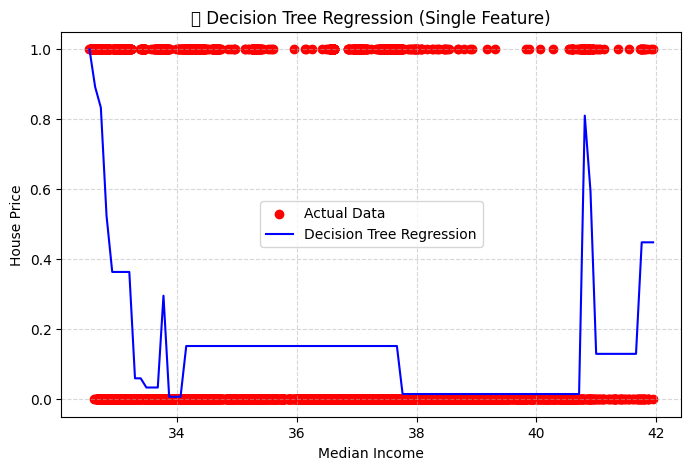

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# ✅ Select only the first feature (e.g., median_income) for training
X_single_feature = X[:, [0]]  # Keeping it 2D for compatibility

# ✅ Train a new Decision Tree model using only one feature
model_dt_single = DecisionTreeRegressor(max_depth=5, random_state=42)
model_dt_single.fit(X_single_feature, y)  # Training the model with one feature

# ✅ Create a smooth grid for visualization
X_grid = np.linspace(X_single_feature.min(), X_single_feature.max(), 100).reshape(-1, 1)

# ✅ Visualizing Decision Tree Predictions with a Smooth Curve
plt.figure(figsize=(8, 5))  # Set figure size
plt.scatter(X_single_feature, y, color='red', label='Actual Data')  # Plot actual data as red scatter points
plt.plot(X_grid, model_dt_single.predict(X_grid), color='blue', label='Decision Tree Regression')  # Plot Decision Tree predictions
plt.legend()  # Add legend for clarity
plt.title("🌳 Decision Tree Regression (Single Feature)")  # Set plot title
plt.xlabel("Median Income")  # Label for X-axis
plt.ylabel("House Price")  # Label for Y-axis
plt.grid(True, linestyle="--", alpha=0.5)  # Enable grid with transparency
plt.show()  # Display the plot

#🌲 Random Forest Predictions

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


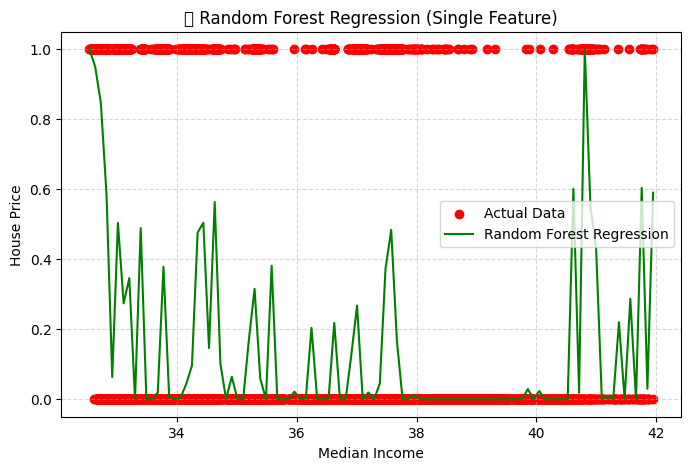

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# ✅ Select only the first feature (e.g., median_income) for training
X_single_feature = X[:, [0]]  # Keep it 2D for compatibility

# ✅ Train a new Random Forest model using only one feature
model_rf_single = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf_single.fit(X_single_feature, y)  # Train with only one feature

# ✅ Create a smooth grid for visualization
X_grid = np.linspace(X_single_feature.min(), X_single_feature.max(), 100).reshape(-1, 1)

# ✅ Visualizing Random Forest Predictions with a Smooth Curve
plt.figure(figsize=(8, 5))  # Set figure size
plt.scatter(X_single_feature, y, color='red', label='Actual Data')  # Scatter plot for actual data
plt.plot(X_grid, model_rf_single.predict(X_grid), color='green', label='Random Forest Regression')  # Plot RF predictions
plt.legend()  # Add legend for clarity
plt.title("🌲 Random Forest Regression (Single Feature)")  # Set plot title
plt.xlabel("Median Income")  # Label for X-axis
plt.ylabel("House Price")  # Label for Y-axis
plt.grid(True, linestyle="--", alpha=0.5)  # Enable grid with transparency
plt.show()  # Display the plot

#📊 Visualizing Predictions Together

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


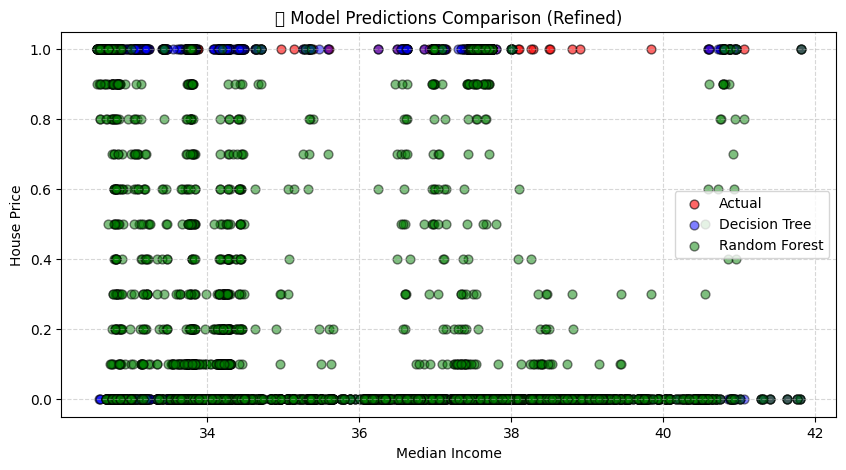

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ✅ Select the first feature (e.g., median_income) for visualization
X_test_single = X_test[:, 0]  # Extract first column for 1D visualization

# ✅ Improved Model Predictions Scatter Plot
plt.figure(figsize=(10, 5))  # Set figure size

# ✅ Scatter plot for actual values
plt.scatter(X_test_single, y_test, color='red', label='Actual', s=40, alpha=0.6, edgecolors='black')

# ✅ Scatter plot for Decision Tree predictions
plt.scatter(X_test_single, y_pred_dt, color='blue', label='Decision Tree', s=40, alpha=0.5, edgecolors='black')

# ✅ Scatter plot for Random Forest predictions
plt.scatter(X_test_single, y_pred_rf, color='green', label='Random Forest', s=40, alpha=0.5, edgecolors='black')

plt.legend()  # Add legend
plt.title("📊 Model Predictions Comparison (Refined)")  # Set title
plt.xlabel("Median Income")  # Label X-axis
plt.ylabel("House Price")  # Label Y-axis
plt.grid(True, linestyle="--", alpha=0.5)  # Add grid for better readability
plt.show()  # Display plot

# 📉 Distribution of Errors

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


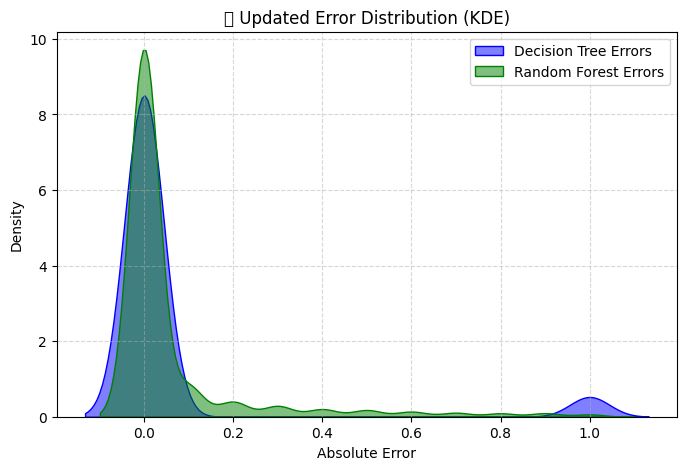

In [ ]:

errors_dt = np.abs(y_test - y_pred_dt)
errors_rf = np.abs(y_test - y_pred_rf)

# 📉 KDE Plot (Error Distribution) - Updated
plt.figure(figsize=(8, 5))  # Set figure size
sns.kdeplot(errors_dt, label="Decision Tree Errors", fill=True, color="blue", alpha=0.5)
sns.kdeplot(errors_rf, label="Random Forest Errors", fill=True, color="green", alpha=0.5)
plt.legend()  # Add legend
plt.title("📉 Updated Error Distribution (KDE)")  # Set title
plt.xlabel("Absolute Error")  # Label X-axis
plt.ylabel("Density")  # Label Y-axis
plt.grid(True, linestyle="--", alpha=0.5)  # Add grid for better readability
plt.show()  # Display plot

#🚀 Final Model Performance Summary

In [ ]:
from sklearn.metrics import mean_squared_error, median_absolute_error

# ✅ Compute additional metrics
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))  # RMSE for Decision Tree
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))  # RMSE for Random Forest

# ✅ Prevent division by zero in MAPE calculation
y_test_safe = np.where(y_test == 0, np.nan, y_test)  # Replace zero values with NaN

# ✅ Compute MAPE safely
mape_dt = np.nanmean(np.abs((y_test_safe - y_pred_dt) / y_test_safe)) * 100  # MAPE for Decision Tree
mape_rf = np.nanmean(np.abs((y_test_safe - y_pred_rf) / y_test_safe)) * 100  # MAPE for Random Forest

# ✅ Compute MAE & MedAE
mae_dt = np.mean(np.abs(y_test - y_pred_dt))  # MAE for Decision Tree
mae_rf = np.mean(np.abs(y_test - y_pred_rf))  # MAE for Random Forest
medae_dt = median_absolute_error(y_test, y_pred_dt)  # MedAE for Decision Tree
medae_rf = median_absolute_error(y_test, y_pred_rf)  # MedAE for Random Forest

# ✅ Compute Adjusted R² (Avoid division by zero error)
n = len(y_test)  # Number of observations
p = X_test.shape[1]  # Number of predictor variables

adj_r2_dt = 1 - (1 - r2_dt) * ((n - 1) / (n - p - 1)) if p < n - 1 else np.nan
adj_r2_rf = 1 - (1 - r2_rf) * ((n - 1) / (n - p - 1)) if p < n - 1 else np.nan

# ✅ Create updated performance summary table
performance_df = pd.DataFrame({
    "Metric": ["R²", "Adjusted R²", "MAE", "MSE", "RMSE", "MAPE", "MedAE"],
    "Decision Tree": [r2_dt, adj_r2_dt, mae_dt, mse_dt, rmse_dt, mape_dt, medae_dt],
    "Random Forest": [r2_rf, adj_r2_rf, mae_rf, mse_rf, rmse_rf, mape_rf, medae_rf]
})

# ✅ Display the updated performance summary table
display(performance_df.style.set_caption("📊 Enhanced Performance Summary"))

,Metric,Decision Tree,Random Forest
0,R²,0.514957,0.708528
1,Adjusted R²,0.513661,0.707749
2,MAE,0.057897,0.064777
3,MSE,0.057897,0.034792
4,RMSE,0.240619,0.186525
5,MAPE,23.251748,25.297203
6,MedAE,0.000000,0.000000
